# Warm up

In [1]:
x = [0, 1, -1, 0, 0]
y = [0]
for i in range(1, len(x)):
    y.append(-0.5*y[i-1] + x[i] + 2*x[i-1])
print(y)

[0, 1.0, 0.5, -2.25, 1.125]


In [2]:
import numpy as np
x = np.array([0, 1, -1, 0, 0], dtype = float)

y = np.array([0, 0, 0, 0, 0], dtype = float)
for i in range(1, len(x)):
    y[i] = -0.5*y[i-1] + x[i] + 2*x[i-1]
print(y)

[ 0.     1.     0.5   -2.25   1.125]


In [3]:
from scipy import signal
x = np.array([0, 1, -1, 0, 0], dtype = float)
b = [1,2]
a = [1, 0.5]
y = signal.lfilter(b, a, x)
print(y)

[ 0.     1.     0.5   -2.25   1.125]


Text(0.5, 0, 'n')

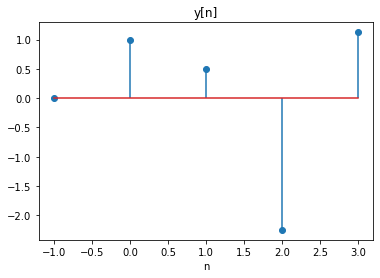

In [4]:
from matplotlib import pyplot as plt
n = np.arange(-1, 4)
plt.stem(n, y)
plt.title('y[n]')
plt.xlabel('n')

In [5]:
import numpy as np
h = np.array([1, 2, -1], dtype= float)
x = np.array([1, 3], dtype = float)

M = len(h)
N = len(x)
L = M + N -1
y = np.zeros([L])
for n in range(L):
    y[n] = 0
    for k in range(N):
        if n-k < 0 or n-k >= M:
            h_n_k = 0
        else:
            h_n_k = h[n-k]
        y[n] = y[n] + x[k] * h_n_k
print(y)

[ 1.  5.  5. -3.]


In [6]:
import numpy as np
from scipy import signal
h = np.array([1, 2, -1], dtype = float)
x = np.array([1, 3], dtype = float)
print(np.convolve(x,h))
print(signal.convolve(x, h))

[ 1.  5.  5. -3.]
[ 1.  5.  5. -3.]


In [7]:
x = np.array([1, 0, 2, -1])
h = np.array([1, 0, 0, 0, 3])
y = np.convolve(x, h)
print(y)

[ 1  0  2 -1  3  0  6 -3]


Text(0.5, 1.0, 'y[n]')

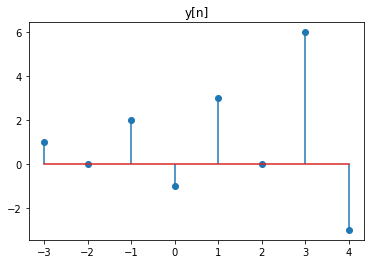

In [8]:
n = np.arange(-3, 5)
plt.stem(n, y)
plt.title('y[n]')

# Exercise

# y[n] = x[n] - x[n-1] -> h[n] = δ[n] - δ[n-1] 

System above is stable because between (-∞,∞) interval |h[n]| is finite

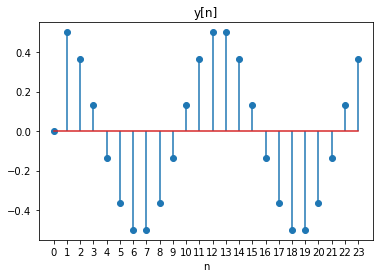

In [10]:
import numpy as np
import scipy.signal as sc
pi = np.pi
n = np.arange(0, 24, 1) #2π = π/6 -> f = 1/12 -> N = 12 period
x = np.sin((pi*n)/6)
h = np.array([1, -1], dtype = float)
y = sc.convolve(x, h, 'same')
plt.figure()
plt.stem(n, y)
plt.xticks(n)
plt.title('y[n]')
plt.xlabel('n')

plt.show()

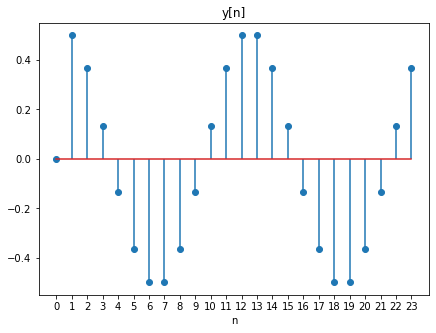

In [11]:
b = [1, -1] #Input coefficients
a = [1] #Output coefficients
y = sc.lfilter(b, a, x)
plt.figure(figsize = (7,5))
plt.stem(n, y)
plt.xticks(n)
plt.title('y[n]')
plt.xlabel('n')

plt.show()

# Another Exercise

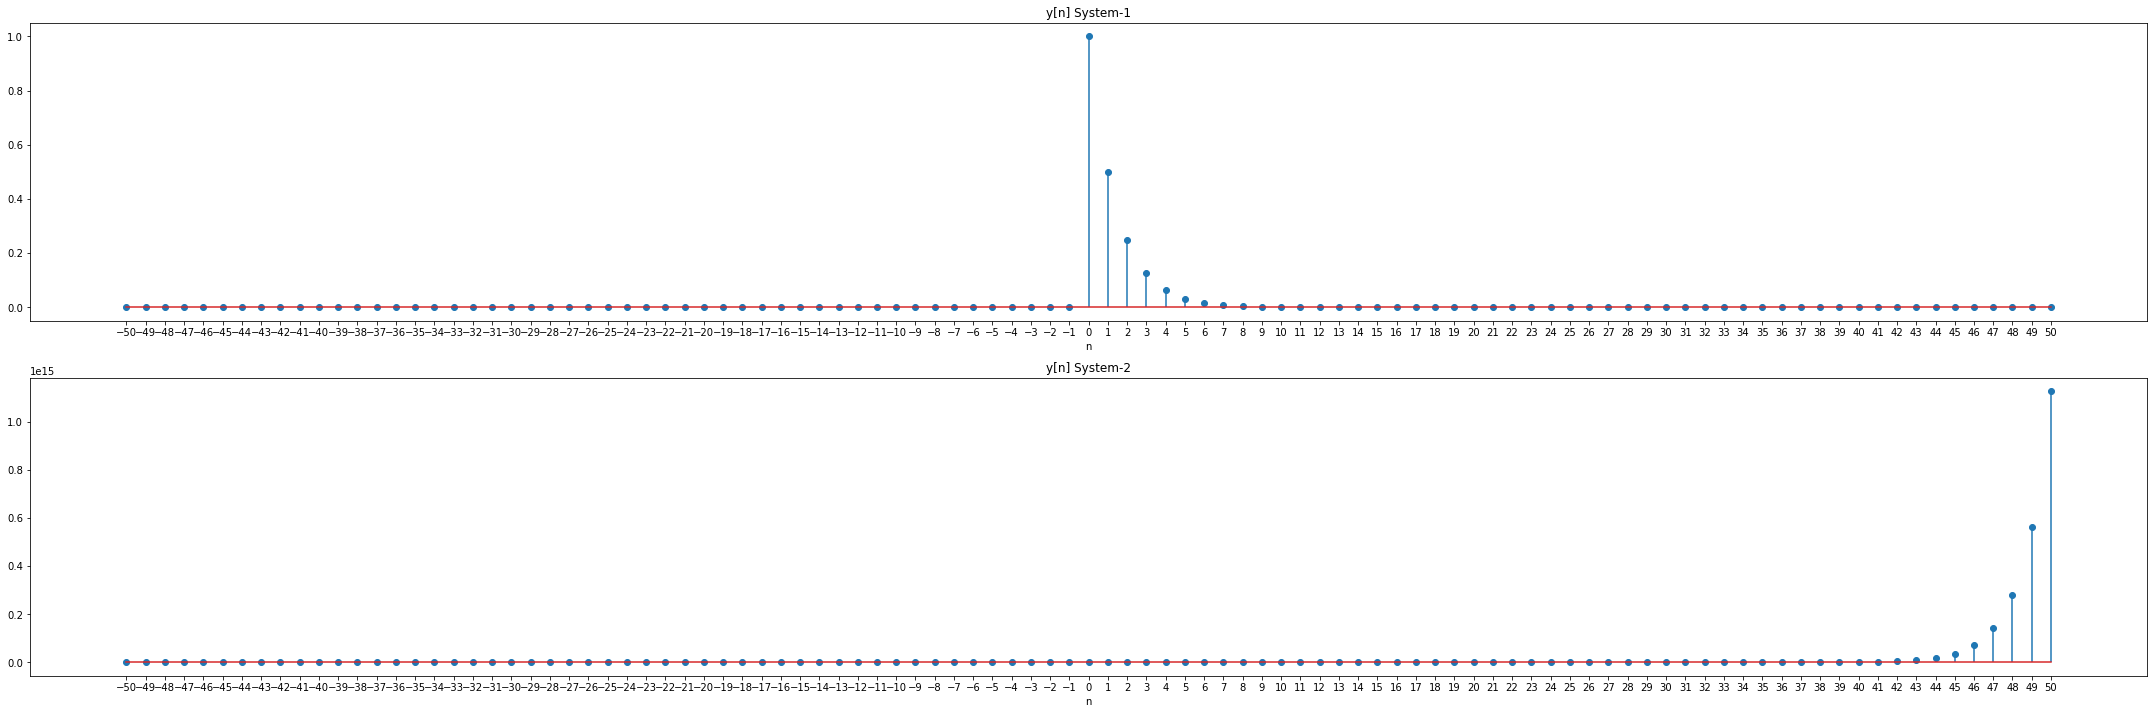

In [12]:
n = np.arange(-50, 51, 1)
x = sc.unit_impulse(101, 'mid')
b1 = [1] #Input coefficients
a1 = [1, -0.5] #Output coefficients
y1 = sc.lfilter(b1, a1, x)
plt.figure(figsize = (30,10))
plt.subplot(2,1,1)
plt.stem(n, y1)
plt.xticks(n)
plt.title('y[n] System-1')
plt.xlabel('n')

b2 = [1]
a2 = [1, -2]
y2 = sc.lfilter(b2, a2, x)
plt.subplot(2,1,2)
plt.stem(n, y2)
plt.xticks(n)
plt.title('y[n] System-2')
plt.xlabel('n')
plt.tight_layout(pad = 1.0)

plt.show()

# System 1 is stable because |y[n]|<=B < ∞
# System 2 is not stable because |y[n]| -> ∞

# System 1 and system 2 is causal because when n < 0, y[n] = 0

<IPython.core.display.Javascript object>


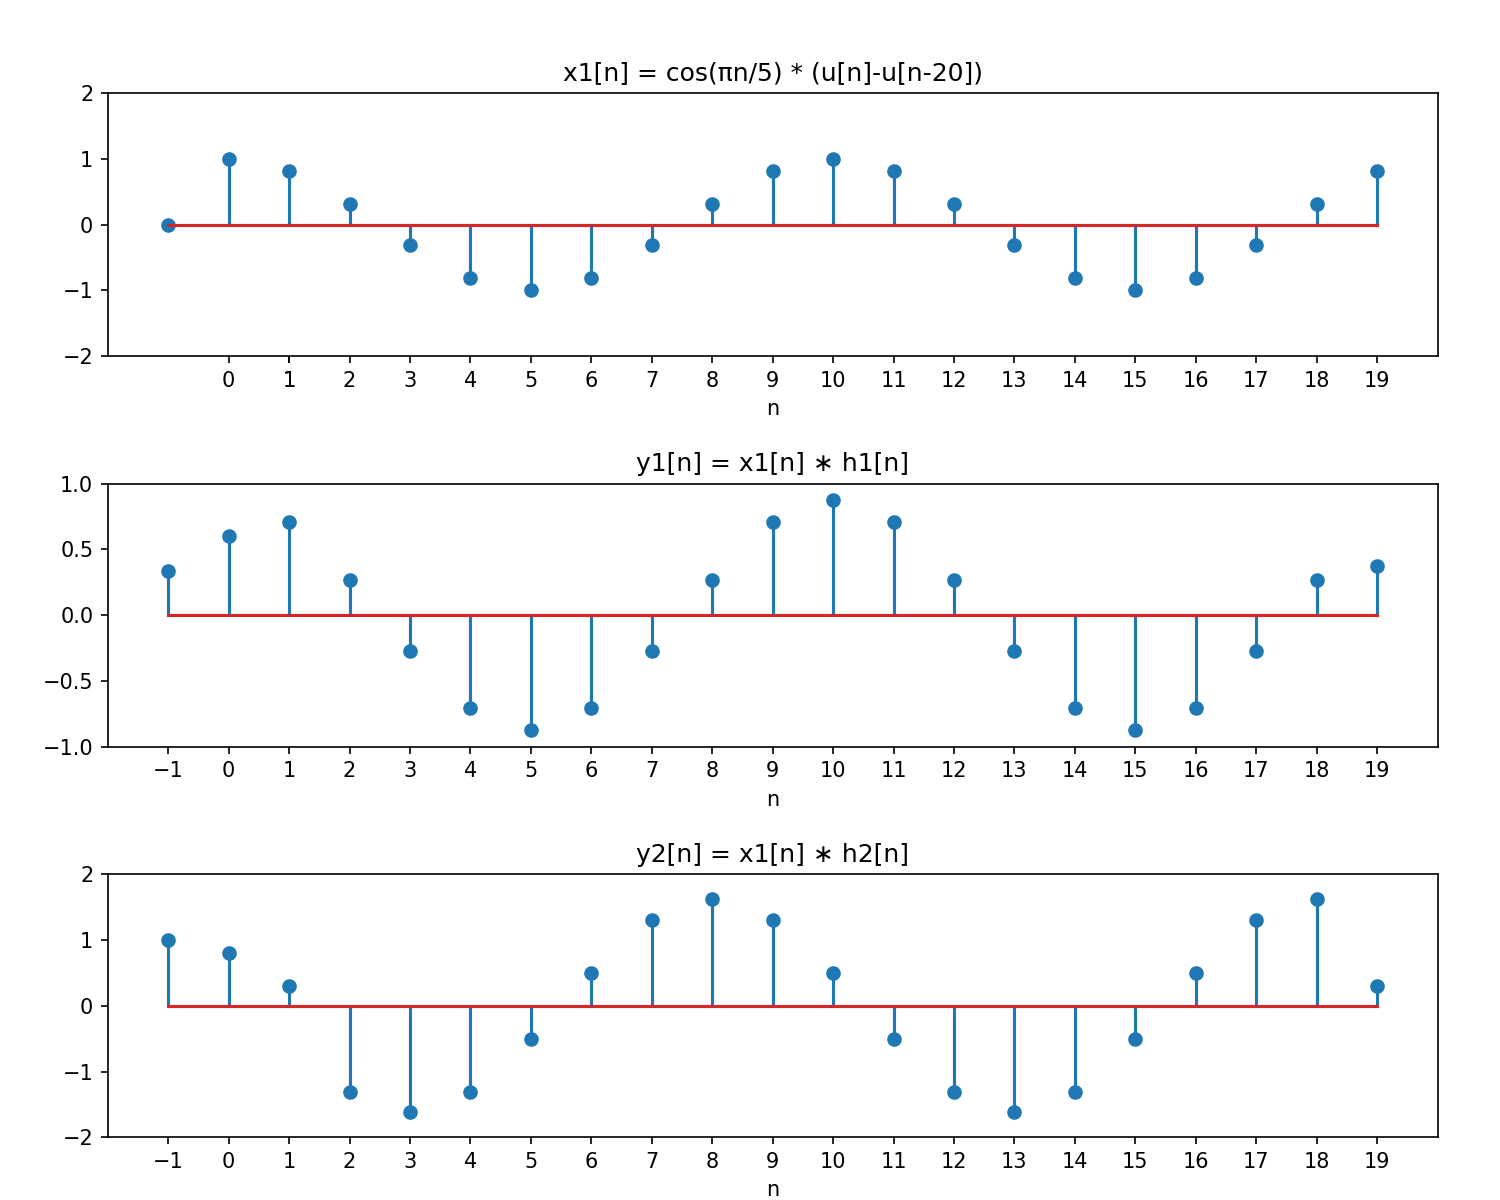

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook
  
# u[n-a] function
def unit_step(a, n): 
    unit =[] 
    for sample in n: 
        if sample<a: 
            unit.append(0) 
        else: 
            unit.append(1) 
    return(unit) 
#δ[n-a] function
def unit_impulse(a, n): 
    delta =[] 
    for sample in n: 
        if sample == a: 
            delta.append(1) 
        else: 
            delta.append(0) 
              
    return delta

n = np.arange(-1, 20, 1) 
k1 = np.arange(-1, 2, 1)
k2 = np.arange(0, 4, 1)
x1n = np.cos(pi*n/5) * (np.array(unit_step(0, n)) - np.array(unit_step(20, n)))
h1n = (1/3)*(np.array(unit_impulse(-1, k1), dtype = float) + np.array(unit_impulse(0, k1), dtype = float) + np.array(unit_impulse(1, k1), dtype = float))
y1n = np.convolve(x1n, h1n, 'same')
h2n = np.array(unit_impulse(0, k2)) - np.array(unit_impulse(3, k2))
y2n = np.convolve(x1n, h2n, 'same')

plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
plt.stem(n, x1n)
plt.ylim(-2, 2)
plt.title('x1[n] = cos(πn/5) * (u[n]-u[n-20])')
plt.xticks(abs(n))
plt.xlabel('n')
plt.tight_layout(pad = 3.0)


plt.subplot(3,1,2)
plt.stem(n, y1n)
plt.ylim(-1, 1)
plt.title('y1[n] = x1[n] ∗ h1[n]')
plt.xticks(n)
plt.xlabel('n')

plt.subplot(3,1,3)
plt.stem(n, y2n)
plt.ylim(-2, 2)
plt.title('y2[n] = x1[n] ∗ h2[n]')
plt.xticks(n)
plt.xlabel('n')
plt.show()

<IPython.core.display.Javascript object>


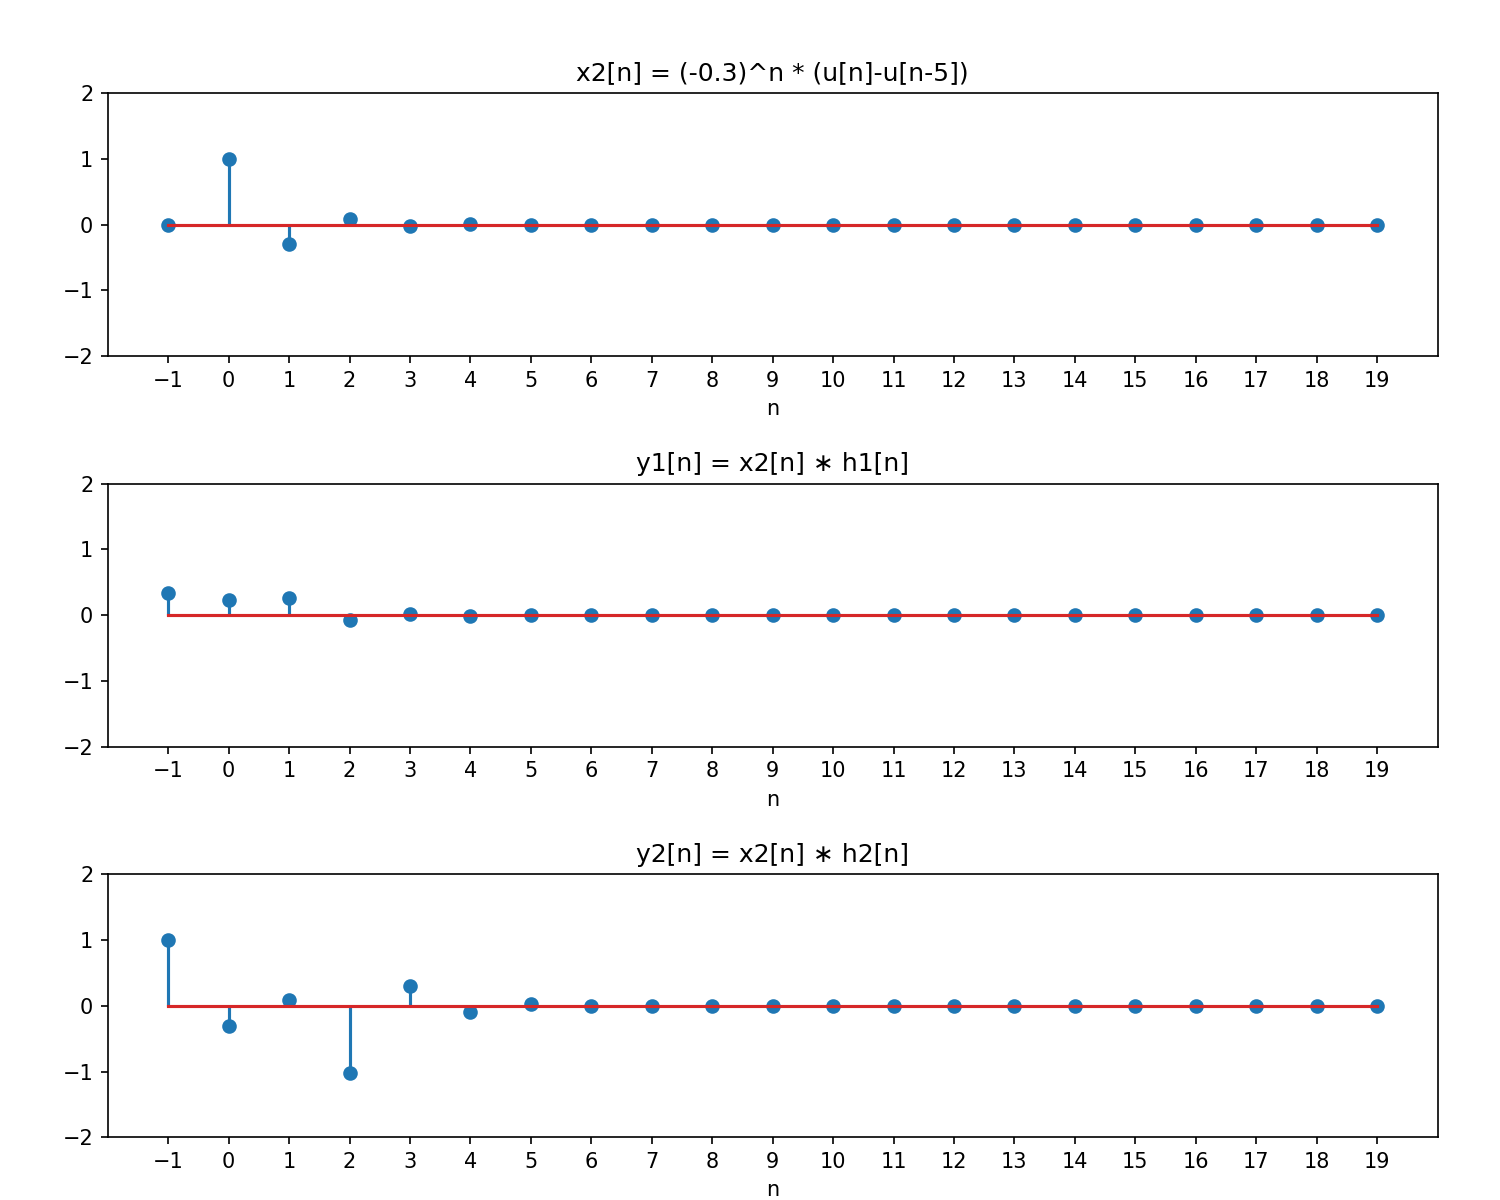

In [14]:
n = np.arange(-1, 20, 1) 
x2n = np.power(-0.3, n) * (np.array(unit_step(0, n)) - np.array(unit_step(5, n)))
y1n = np.convolve(x2n, h1n, 'same')
y2n = np.convolve(x2n, h2n, 'same')

plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
plt.stem(n, x2n)
plt.ylim(-2, 2)
plt.title('x2[n] = (-0.3)^n * (u[n]-u[n-5])')
plt.xticks(n)
plt.xlabel('n')
plt.tight_layout(pad = 3.0)


plt.subplot(3,1,2)
plt.stem(n, y1n)
plt.ylim(-2, 2)
plt.title('y1[n] = x2[n] ∗ h1[n]')
plt.xticks(n)
plt.xlabel('n')

plt.subplot(3,1,3)
plt.stem(n, y2n)
plt.ylim(-2, 2)
plt.title('y2[n] = x2[n] ∗ h2[n]')
plt.xticks(n)
plt.xlabel('n')

plt.show()